마스크 착용여부를 확인하는 모델을 만들어봅시다

https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset

kaggle 다운로드를 위해서는 회원가입이 필요합니다. (무료)

이미지를 다운로드 한 후에 구글 드라이브에 업로드 합시다


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/Tensorflow AI/New Masks Dataset'
img_height = 150
img_width = 150

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [ ]:
# 구글 드라이브에서 데이터 불러오기
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Train',    
  image_size=(img_height, img_width))

Found 600 files belonging to 2 classes.


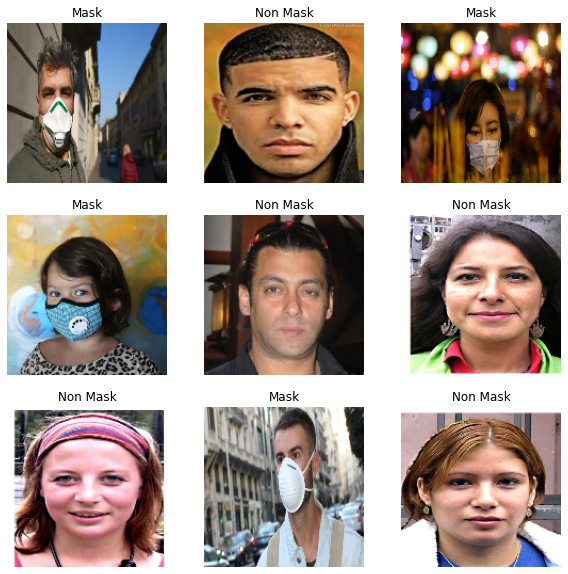

In [ ]:
# 데이터의 이미지들을 살펴봅니다. 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('int'))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
imgs = []
for img, lable in train_ds.take(1):
  print(img.shape)
  print(lable.shape)

(32, 150, 150, 3)
(32,)


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Validation',    
  image_size=(img_height, img_width))

Found 306 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Test',    
  image_size=(img_height, img_width))

Found 100 files belonging to 2 classes.


In [35]:
train_ds.class_names

['Mask', 'Non Mask']

In [ ]:
num_classes = 2
epochs = 5

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32,(3,3),padding='SAME',activation='relu'))  # kernel size가 같은 경우는 한개로 써도 됨 (3,3) --> 3
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2,activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)            

In [ ]:
# 테스트셋 정확도 평가

test_loss , test_acc = model.evaluate(test_ds)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 2s 215ms/step - loss: 0.2552 - acc: 0.8900
test acc :0.8899999856948853 test loss:0.25524482131004333


In [ ]:
# 모델 저장하기
model.save(data_dir+'mask.h5')